<h1 style="text-align:center; color:blue; font-size:48px;">
🐼 Análisis de datos en Pandas 🐼
</h1>

<h2 style="text-align:center; color:maroon; font-size:28px;">
📊 Visualización de datos con Matplotlib 📊
</h2>

<h4 style="text-align:center; color:gold; font-size:18px;">
Tarea S10.01
</h4>



### Nivel 3 ###
El nivel 3 de este sprint es totalmente diferente a otros sprints que has hecho hasta ahora,  
ya que son ejercicios más abstractos que requieren dedicarles bastante esfuerzo.  
No continúan con el mismo dataset de los niveles anteriores,   
sino que plantean dos situaciones nuevas totalmente distintas entre sí.

<h5 style="color:#ff6666; font-size:1.1em;">
Consideraciones técnicas sobre la estructura y los idiomas
</h5>

<p style="font-size:0.85em; line-height:1.4em;">
He utilizado el castellano tanto en los comentarios como en la nomenclatura del código.<br>
Sin embargo, los datos de las tablas importadas mantienen sus idiomas originales: inglés y catalán.<br>
Este aspecto es relevante para evitar posibles ambigüedades en la interpretación del flujo de trabajo.
</p>

### Tarea 1. ###

Crea una función que tome un dataframe como parámetro de entrada.  

La función debe crear (y exportar) un gráfico automáticamente para cada columna del dataframe.  
Por ejemplo:
- un histograma o boxplot si la variable es numérica
- un gráfico de barras con los valores más frecuentes si es categórica
- un gráfico de barras con los años más frecuentes si el dato está en formato fecha  

La idea es crear una función que funcione para cualquier dataframe, no solo con el que hemos trabajado hasta ahora.  
Muestra el resultado de la función en alguno de los datasets de ejemplo que contiene el paquete seaborn.  

Por ejemplo:
<span style="color:gold;">iris, penguins o titanic</span>

Ten en cuenta que en el siguiente sprint trabajarás exclusivamente con gráficos.   
El objetivo de este ejercicio no es crear gráficos muy elaborados, sino resolver una necesidad de manera 
<span style="color:gold;">rápida y automática</span>.



In [1]:
# Librerías y módulos esenciales para el desarrollo de las tareas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_datetime64_any_dtype


In [2]:
# Cargo dataset “Penguins” proporcionado por Seaborn

penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
# Verifico formatos columnas

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Cargo dataset “Iris” proporcionado por Seaborn

iris = sns.load_dataset("iris")
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Verifico formatos columnas

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Cargo dataset “Titanic” proporcionado por Seaborn

titanic = sns.load_dataset("titanic")
#pd.set_option("display.max_rows", None)

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
# Controlo dataset

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<span style="color:gold; font-size:1.2em;">
El dataset Titanic necesita una limpieza previa para poder trabajar con precisión:
</span><br><br>

<span style="color:#4da6ff">
Elimino filas completamente vacías:
</span><br>
titanic_limpio = titanic.dropna(how="all")<br><br>

<span style="color:#4da6ff">
Limpio nombres de columnas:
</span><br>
titanic_limpio.columns = titanic_limpio.columns.str.strip()<br>
titanic_limpio.columns = titanic_limpio.columns.str.replace(" ","")<br>
titanic_limpio.columns = titanic_limpio.columns.str.lower()<br><br>

<span style="color:#4da6ff">
Elimino la columna "deck" (más del 75% de valores NaN):
</span><br>
titanic_limpio = titanic_limpio.drop(columns=["deck"])<br><br>

<span style="color:#4da6ff">
Relleno NaN en "age", "embarked" y "embark_town":
</span><br>
titanic_limpio["age"] = titanic_limpio["age"].fillna(titanic_limpio["age"].median())<br>
titanic_limpio["embarked"] = titanic_limpio["embarked"].fillna(titanic_limpio["embarked"].mode()[0])<br>
titanic_limpio["embark_town"] = titanic_limpio["embark_town"].fillna(titanic_limpio["embark_town"].mode()[0])<br><br>

<span style="color:#4da6ff">
Convierto tipos de datos de "class", "adult_male" y "alone":
</span><br>
titanic_limpio["adult_male"] = titanic_limpio["adult_male"].astype(int)<br>
titanic_limpio["alone"] = titanic_limpio["alone"].astype(int)<br>
titanic_limpio["class"] = titanic_limpio["class"].astype("category")<br><br>

<span style="color:gold;">
El paso que acabo de escribir me hizo pensar en integrar una limpieza básica directamente dentro<br>
de la función, para que pueda aceptar cualquier dataset y generar gráficos con mayor precisión.
</span>

In [8]:
def generar_graficos(df):

    '''
    Limpia el dataframe de forma genérica para evitar errores.

    - Elimina filas completamente vacías
    - Normaliza los nombres de las columnas
    - Elimina columnas con más del 75% de valores NaN
    - Rellena automáticamente los valores NaN:
            · Mediana para columnas numéricas
            · Moda para columnas categóricas
            · Mediana para columnas Fechas
    '''

    df = df.dropna(how="all")

    df.columns = (df.columns.str.strip().str.replace(" ", "").str.lower())

    for columna in df.columns:
        if df[columna].isna().sum() == 0:
            continue

        if is_datetime64_any_dtype(df[columna]):
            df[columna] = df[columna].fillna(df[columna].median())

        elif is_numeric_dtype(df[columna]):
            df[columna] = df[columna].fillna(df[columna].median())
        else:
            moda = df[columna].mode(dropna=True)
            if not moda.empty:
                df[columna] = df[columna].fillna(moda.iloc[0])
            else:
                df[columna] = df[columna].fillna("")

    '''
    Genera automáticamente gráficos según el tipo de columna del dataframe.

    Numéricas:
    - Pie si tienen ≤ 2 valores únicos
    - Boxplot si tienen entre 3 y 15 valores únicos
    - Histograma si tienen > 15 valores únicos
    
    Categóricas/objeto:
    - Pie si tienen ≤ 3 categorías
    - Barra si tienen más de 3

    Fechas:
    - Barra por años

    Muestra cada gráfico y lo exporta a una carpeta específica.
    '''

    for columna in df.columns:
        serie = df[columna]
        valores_unicos = serie.nunique()

        if is_datetime64_any_dtype(serie):
            plt.figure(figsize=(10,4))
            plt.title(columna)
            plt.ylabel("count")
            años = serie.dt.year.value_counts().sort_index()
            años.plot.bar()
            plt.xlabel(None)

        elif is_numeric_dtype(serie):

            if valores_unicos <= 15:
                if valores_unicos <= 2:
                    plt.figure(figsize=(6,6))
                    serie.value_counts().plot.pie(autopct="%1.1f%%")
                    plt.title(columna)
                    plt.ylabel(None)
                    plt.xlabel(None)
                else:
                    plt.figure(figsize=(6,4))
                    serie.plot.box()
                    plt.title(columna)
                    plt.ylabel(None)
                    plt.xticks([])
            else:
                plt.figure(figsize=(6,4))
                serie.plot.hist(bins=30)
                plt.title(columna)
                plt.ylabel("frequency")

        elif isinstance(serie.dtype, pd.CategoricalDtype) or serie.dtype == object:

            if valores_unicos <= 3:
                plt.figure(figsize=(6,4))
                plt.title(columna)
                serie.value_counts().plot.pie(autopct="%1.1f%%")
                plt.xlabel(None)
                plt.ylabel(None)
            else:
                plt.figure(figsize=(6,4))
                plt.title(columna)
                plt.ylabel("count")
                serie.value_counts().plot.bar()
                plt.xlabel(None)

        
        else:
            print("Error")

        plt.savefig(f"Graficos_Exportados/{columna}.png", dpi=200, bbox_inches="tight")
        plt.show()
        plt.close()

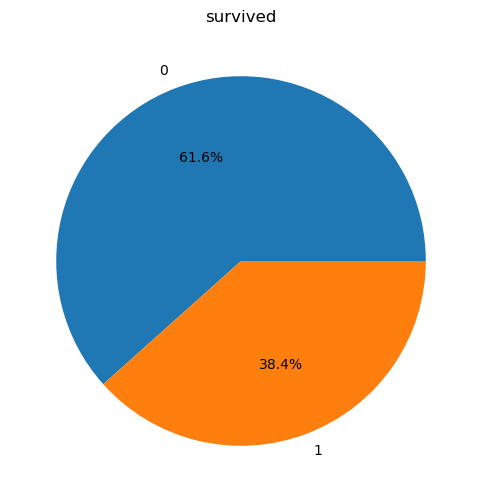

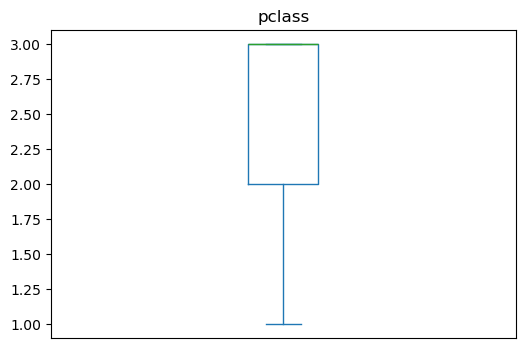

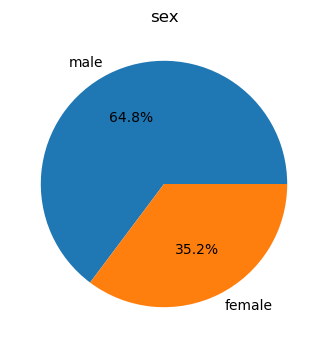

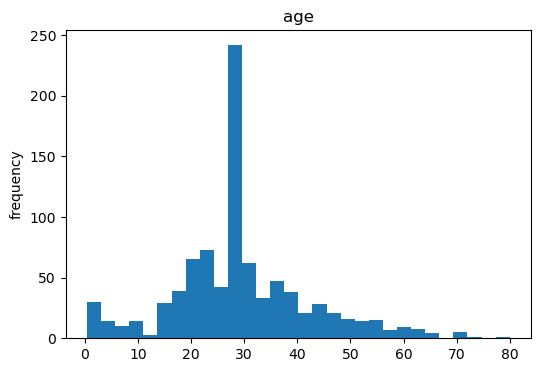

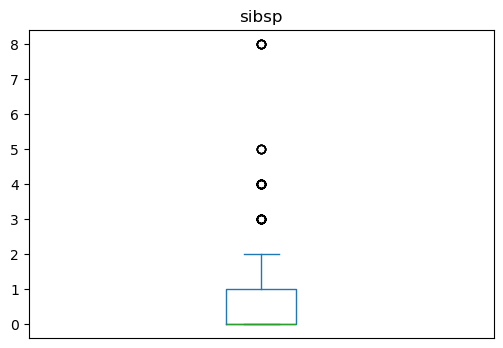

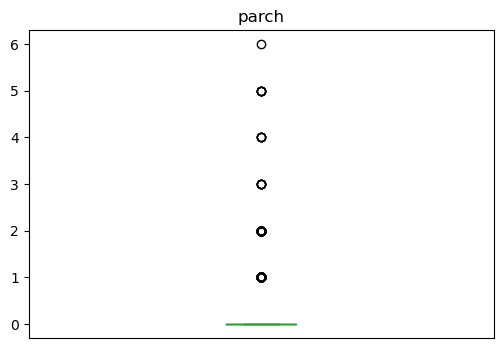

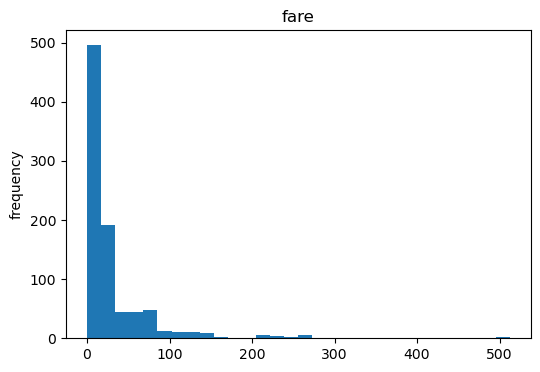

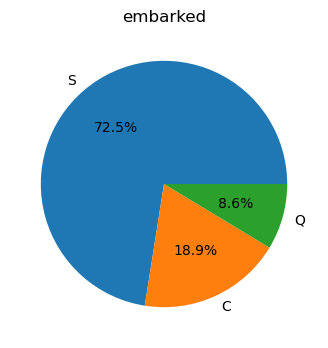

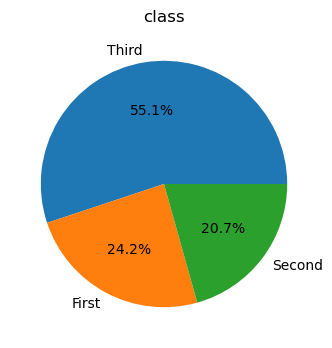

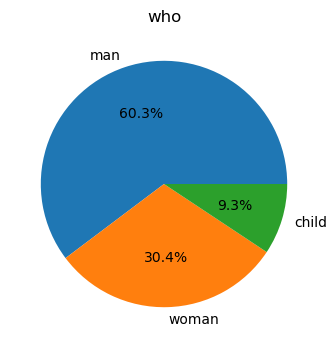

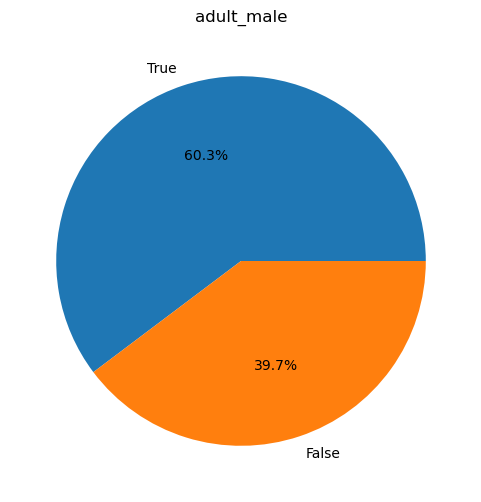

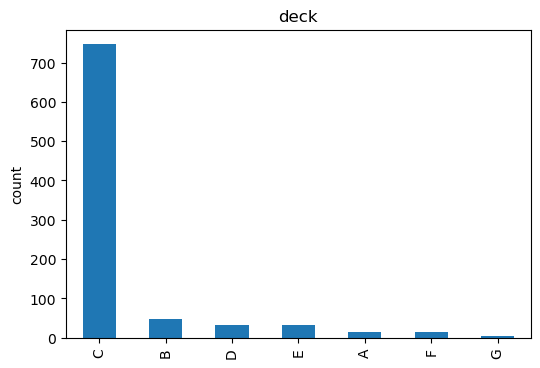

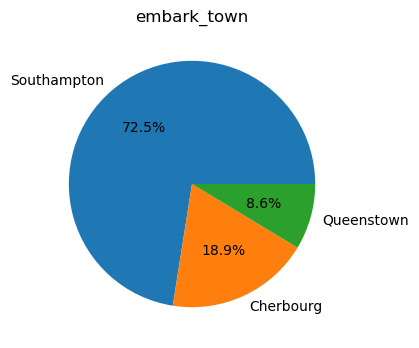

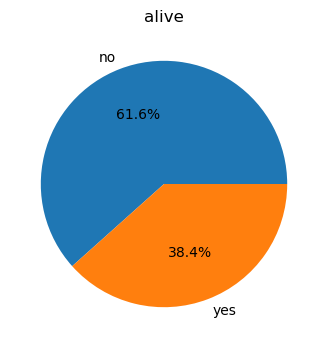

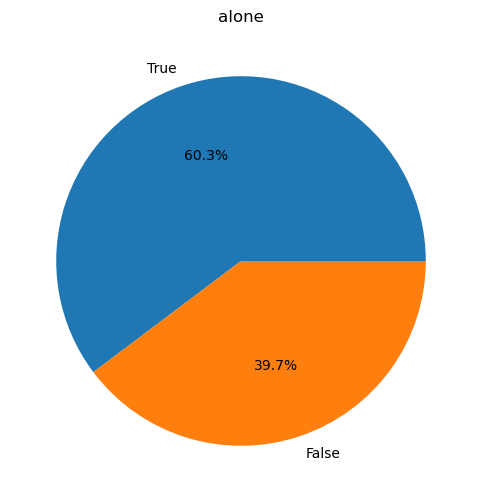

In [9]:
# Ejecución "Titanic"

generar_graficos(titanic)

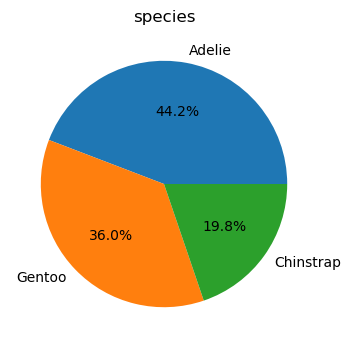

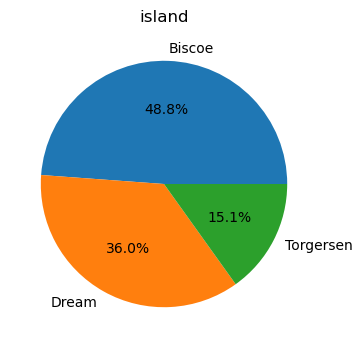

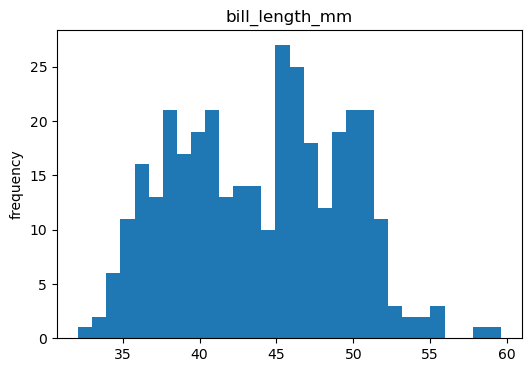

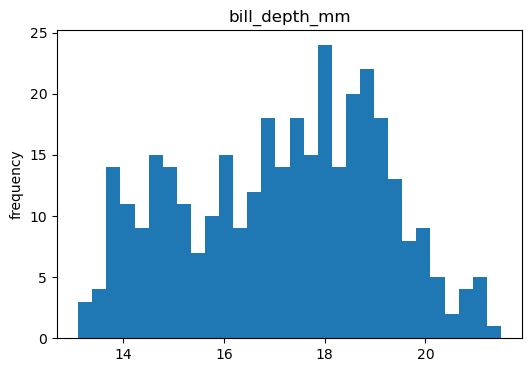

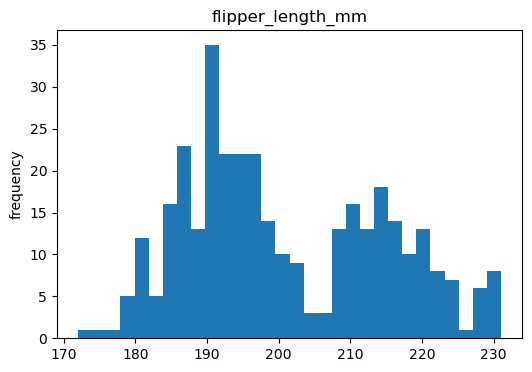

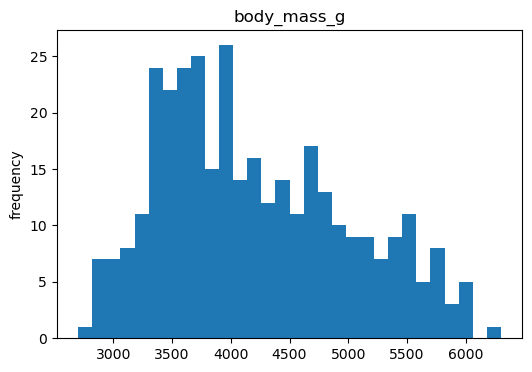

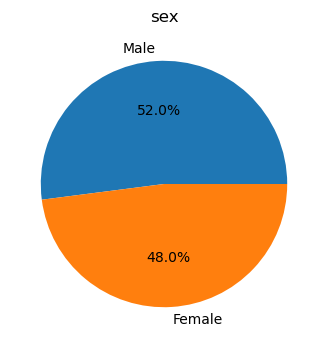

In [10]:
# Ejecución "Penguins"

generar_graficos(penguins)

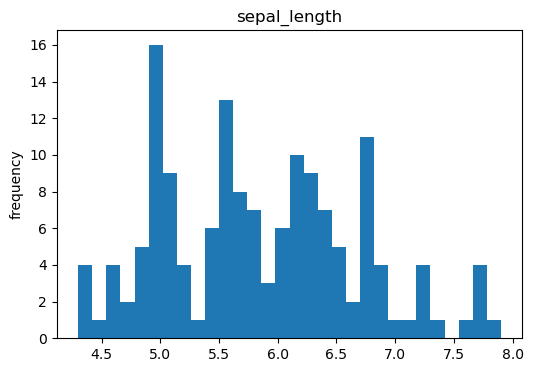

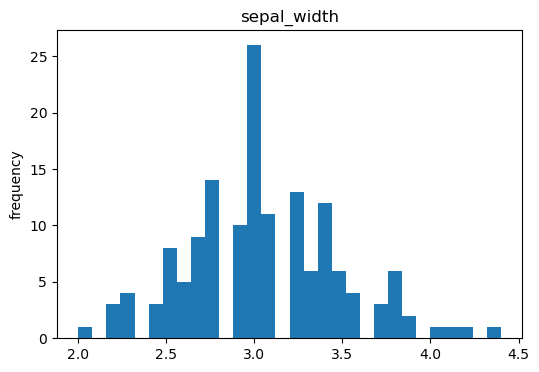

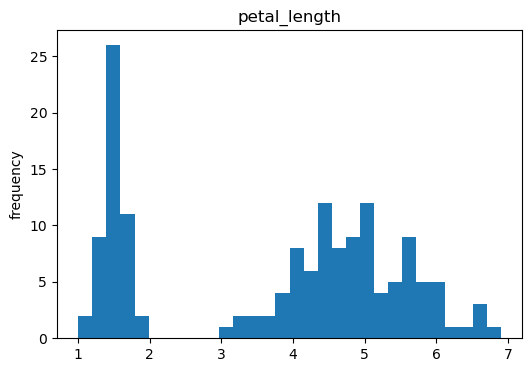

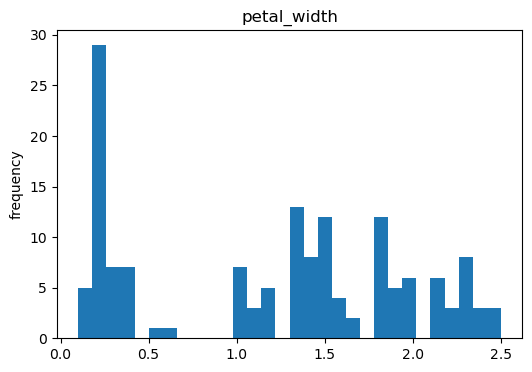

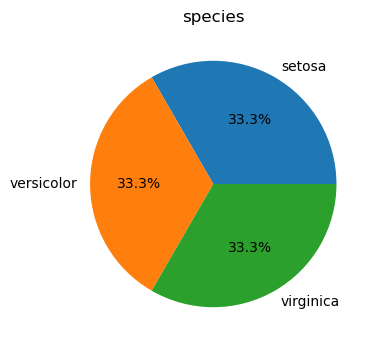

In [11]:
# Ejecución "Iris"

generar_graficos(iris)

#### Validación con dataset adicional ####

Dado que los datasets utilizados en fases anteriores no incluían ninguna variable en formato datetime64,  
he incorporado el dataset "Sprint10_Final", generado en los niveles previos, con el objetivo de validar  
por completo la funcionalidad de la generación de gráficos

In [12]:
Sprint10_Final = pd.read_excel("Archivos_Exportados/Sprint10_Final.xlsx")
Sprint10_Final

,DNI,País d'origen,Ciutat,Gènere,Salari mensual,Grup Professional,Nom_complet,Nacionalitat espanyola,N_Fills,Data de naixament,Edat,Increment,Salari mensual actualitzat
0,16928694K,Portugal,Lisboa,Dona,1144,Grup B,Inês Ferreira Silva,No,No,1953-02-25,72,"3,5%",1184
1,27724652S,Espanya,Barcelona,Dona,1253,Grup A,Clara Sánchez Martínez,Si,Si,1996-03-18,29,5%,1316
2,38141675A,Marroc,Rabat,Altres,1441,Grup A,Fatima Fassi,No,Si,2005-11-06,20,5%,1513
3,59157262R,Marroc,Rabat,Dona,1944,Grup B,Khadija Bennani Bennani,No,No,1995-01-20,30,"3,5%",2012
4,69630528M,Espanya,Barcelona,Home,1043,Grup A,Toni Sánchez García,Si,No,1999-08-09,26,5%,1095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25161375F,Espanya,Sevilla,Dona,1216,Grup B,Marta Ferrer Ferrer,Si,No,1951-06-01,74,"3,5%",1259
996,52145541P,Espanya,Sevilla,Home,971,Grup A,Joan García,Si,No,1959-04-11,66,5%,1020
997,69760120X,Espanya,Barcelona,Dona,682,Grup A,Laia Ferrer Martínez,Si,No,1980-11-11,45,5%,716
998,82947791W,Espanya,Barcelona,Home,1699,Grup C,Jordi García,Si,Si,1984-05-23,41,2%,1733


In [13]:
#Verifico tabla
Sprint10_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DNI                         1000 non-null   object        
 1   País d'origen               1000 non-null   object        
 2   Ciutat                      1000 non-null   object        
 3   Gènere                      940 non-null    object        
 4   Salari mensual              1000 non-null   int64         
 5   Grup Professional           1000 non-null   object        
 6   Nom_complet                 1000 non-null   object        
 7   Nacionalitat espanyola      1000 non-null   object        
 8   N_Fills                     1000 non-null   object        
 9   Data de naixament           1000 non-null   datetime64[ns]
 10  Edat                        1000 non-null   int64         
 11  Increment                   1000 non-null   object       

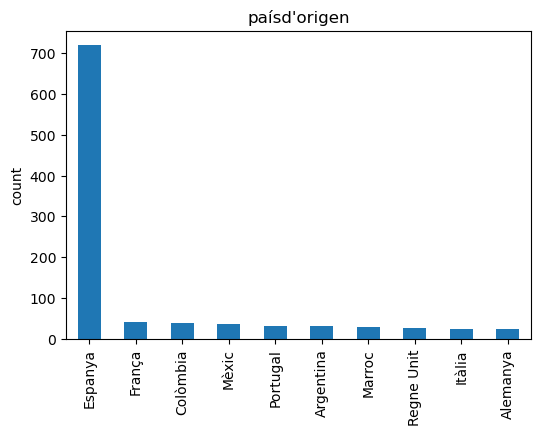

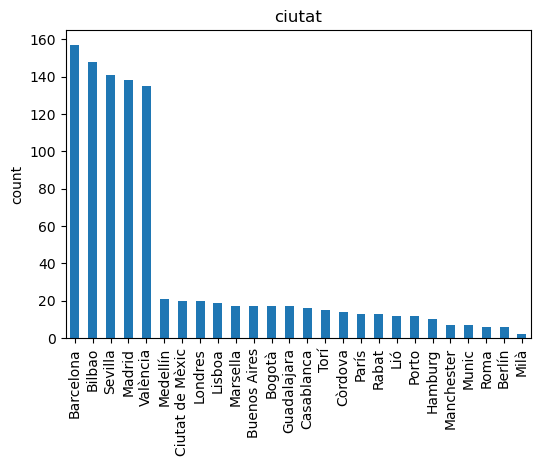

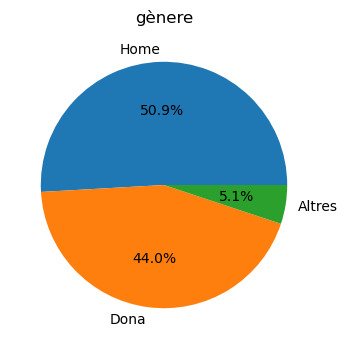

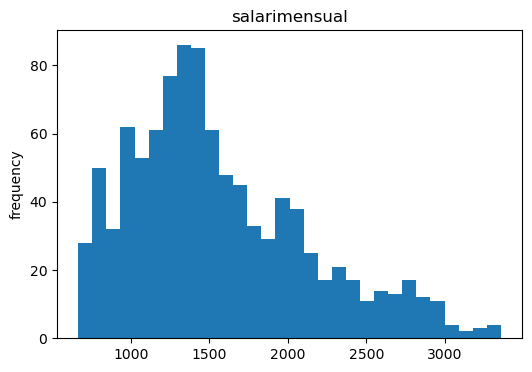

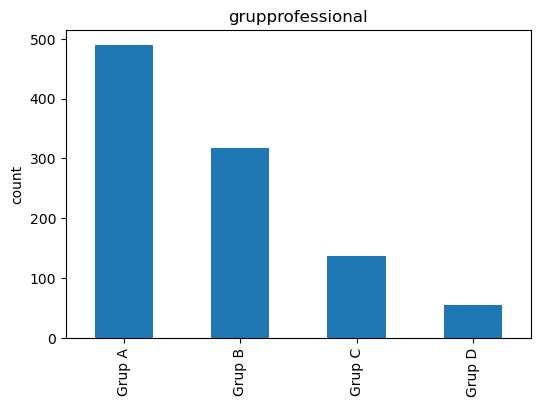

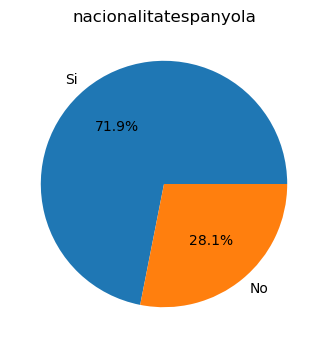

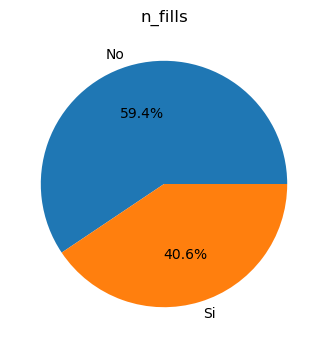

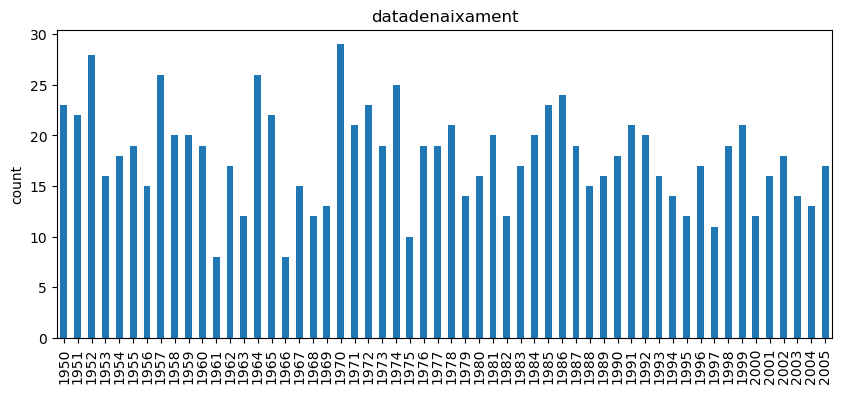

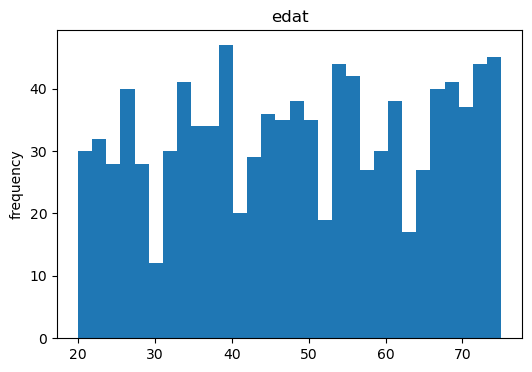

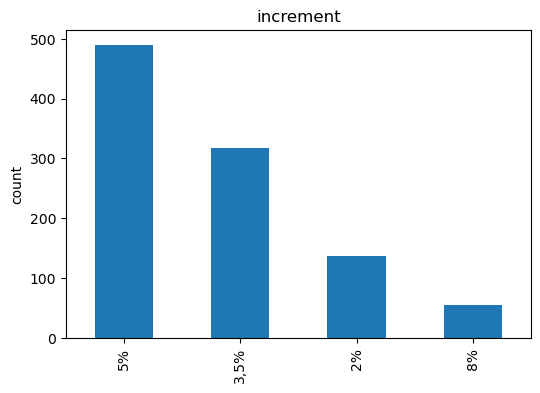

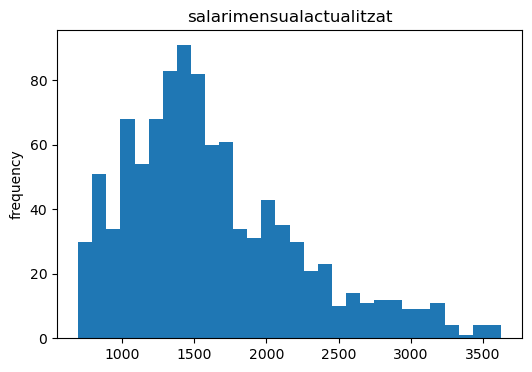

In [14]:
# Ejecución

Sprint10_Final_Limpio = Sprint10_Final.drop(columns=["DNI","Nom_complet"])
generar_graficos(Sprint10_Final_Limpio)

### Tarea 2. ###

- Carga el archivo matriu_distancies.xlsx en pandas, de manera que los nombres de filas y columnas sean los de las ciudades.  
- Borra “Las Palmas de Gran Canaria” y “Palma” para que podamos hacer el trayecto en coche.

Fuente :  <span style="color:gold">Mejores Rutas</span>  

- Nos interesa visitar todas las ciudades principales de España recorriendo la mínima distancia posible.  
     No hace falta que lo hagas de forma óptima; nos interesa que desarrolles una solución razonable utilizando las herramientas que tienes actualmente.  
     Por ejemplo, una aproximación sencilla (que no es óptima) sería ir siempre a la ciudad más cercana que no hayamos visitado todavía.  
     Haz una función que, dada la matriz de distancias y la ciudad de origen, proponga una ruta lo más corta posible, devolviendo una lista con el orden de visita.  
     Da también la distancia total recorrida.  

- (EXTRA) Desde qué ciudad la ruta sería más corta con el algoritmo planteado.

In [15]:
# Cargo el archivo

matriu_distancies = pd.read_excel("Archivos/matriu_distancies.xlsx",index_col="Unnamed: 0")
matriu_distancies

,Barcelona,Valencia,Sevilla,Zaragoza,Málaga,Murcia,Palma,Las Palmas de Gran Canaria,Bilbao,Alicante,Córdoba,Valladolid,Vigo,Gijón,Hospitalet de Llobregat
Barcelona,NaN,303.0,831.0,256.0,770.0,471.0,206.0,2175.0,469.0,407.0,711.0,576.0,908.0,686.0,7.0
Valencia,303.0,NaN,541.0,246.0,468.0,177.0,260.0,1874.0,473.0,125.0,421.0,441.0,766.0,632.0,297.0
Sevilla,831.0,541.0,NaN,646.0,158.0,433.0,791.0,1355.0,703.0,495.0,121.0,486.0,588.0,685.0,824.0
Zaragoza,256.0,246.0,646.0,NaN,628.0,408.0,377.0,2001.0,246.0,368.0,535.0,320.0,652.0,444.0,250.0
Málaga,770.0,468.0,158.0,628.0,NaN,323.0,695.0,1406.0,739.0,391.0,133.0,549.0,716.0,766.0,763.0
Murcia,471.0,177.0,433.0,408.0,323.0,NaN,372.0,1723.0,606.0,69.0,320.0,510.0,800.0,726.0,465.0
Palma,206.0,260.0,791.0,377.0,695.0,372.0,NaN,2093.0,621.0,303.0,671.0,664.0,1000.0,820.0,204.0
Las Palmas de Gran Canaria,2175.0,1874.0,1355.0,2001.0,1406.0,1723.0,2093.0,NaN,2022.0,1792.0,1470.0,1790.0,1682.0,1925.0,2168.0
Bilbao,469.0,473.0,703.0,246.0,739.0,606.0,621.0,2022.0,NaN,583.0,618.0,232.0,486.0,223.0,465.0
Alicante,407.0,125.0,495.0,368.0,391.0,69.0,303.0,1792.0,583.0,NaN,379.0,515.0,821.0,722.0,401.0


In [16]:
# Controlo generico

matriu_distancies.info()

# Copia de seguridad

matriu_distancies_c = matriu_distancies.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Barcelona to Hospitalet de Llobregat
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Barcelona                   14 non-null     float64
 1   Valencia                    14 non-null     float64
 2   Sevilla                     14 non-null     float64
 3   Zaragoza                    14 non-null     float64
 4   Málaga                      14 non-null     float64
 5   Murcia                      14 non-null     float64
 6   Palma                       14 non-null     float64
 7   Las Palmas de Gran Canaria  14 non-null     float64
 8   Bilbao                      14 non-null     float64
 9   Alicante                    14 non-null     float64
 10  Córdoba                     14 non-null     float64
 11  Valladolid                  14 non-null     float64
 12  Vigo                        14 non-null     float64
 13  Gijón        

In [17]:
# Borro “Las Palmas de Gran Canaria” y “Palma”

matriu_distancies_c = matriu_distancies_c.drop(columns=["Las Palmas de Gran Canaria","Palma"],
                                               index=["Las Palmas de Gran Canaria","Palma"])

# Verifico cambios

matriu_distancies_c


,Barcelona,Valencia,Sevilla,Zaragoza,Málaga,Murcia,Bilbao,Alicante,Córdoba,Valladolid,Vigo,Gijón,Hospitalet de Llobregat
Barcelona,NaN,303.0,831.0,256.0,770.0,471.0,469.0,407.0,711.0,576.0,908.0,686.0,7.0
Valencia,303.0,NaN,541.0,246.0,468.0,177.0,473.0,125.0,421.0,441.0,766.0,632.0,297.0
Sevilla,831.0,541.0,NaN,646.0,158.0,433.0,703.0,495.0,121.0,486.0,588.0,685.0,824.0
Zaragoza,256.0,246.0,646.0,NaN,628.0,408.0,246.0,368.0,535.0,320.0,652.0,444.0,250.0
Málaga,770.0,468.0,158.0,628.0,NaN,323.0,739.0,391.0,133.0,549.0,716.0,766.0,763.0
Murcia,471.0,177.0,433.0,408.0,323.0,NaN,606.0,69.0,320.0,510.0,800.0,726.0,465.0
Bilbao,469.0,473.0,703.0,246.0,739.0,606.0,NaN,583.0,618.0,232.0,486.0,223.0,465.0
Alicante,407.0,125.0,495.0,368.0,391.0,69.0,583.0,NaN,379.0,515.0,821.0,722.0,401.0
Córdoba,711.0,421.0,121.0,535.0,133.0,320.0,618.0,379.0,NaN,419.0,589.0,634.0,704.0
Valladolid,576.0,441.0,486.0,320.0,549.0,510.0,232.0,515.0,419.0,NaN,337.0,224.0,570.0


In [18]:
# Reemplazo los NaN por "0" (Cero) al fin de poder exeguir calculos.

matriu_distancies_c = matriu_distancies_c.fillna(0)

matriu_distancies_c

,Barcelona,Valencia,Sevilla,Zaragoza,Málaga,Murcia,Bilbao,Alicante,Córdoba,Valladolid,Vigo,Gijón,Hospitalet de Llobregat
Barcelona,0.0,303.0,831.0,256.0,770.0,471.0,469.0,407.0,711.0,576.0,908.0,686.0,7.0
Valencia,303.0,0.0,541.0,246.0,468.0,177.0,473.0,125.0,421.0,441.0,766.0,632.0,297.0
Sevilla,831.0,541.0,0.0,646.0,158.0,433.0,703.0,495.0,121.0,486.0,588.0,685.0,824.0
Zaragoza,256.0,246.0,646.0,0.0,628.0,408.0,246.0,368.0,535.0,320.0,652.0,444.0,250.0
Málaga,770.0,468.0,158.0,628.0,0.0,323.0,739.0,391.0,133.0,549.0,716.0,766.0,763.0
Murcia,471.0,177.0,433.0,408.0,323.0,0.0,606.0,69.0,320.0,510.0,800.0,726.0,465.0
Bilbao,469.0,473.0,703.0,246.0,739.0,606.0,0.0,583.0,618.0,232.0,486.0,223.0,465.0
Alicante,407.0,125.0,495.0,368.0,391.0,69.0,583.0,0.0,379.0,515.0,821.0,722.0,401.0
Córdoba,711.0,421.0,121.0,535.0,133.0,320.0,618.0,379.0,0.0,419.0,589.0,634.0,704.0
Valladolid,576.0,441.0,486.0,320.0,549.0,510.0,232.0,515.0,419.0,0.0,337.0,224.0,570.0


In [19]:
def buscar_ruta_rapida(matriz, ciudad_origen):

    '''
    Limpia la matriz convirtiendo todo a lower().
    Luego establece tres variables que se irán sobrescribiendo:
    ciudad_actual, ciudades_vistas y km_totales.
    Gracias al bucle while, la función actualiza estas variables
    y encuentra la ruta más rápida eligiendo siempre la ciudad más cercana.
    '''

    matriz.index = matriz.index.str.lower()
    matriz.columns = matriz.columns.str.lower()

    ciudades_pendientes = list(matriz.index)
    ciudades_pendientes.remove(ciudad_origen)

    ciudad_actual = ciudad_origen
    ciudades_vistas = [ciudad_origen]
    km_totales = 0

    while ciudades_pendientes:

        fila = matriz.loc[ciudad_actual, ciudades_pendientes]

        fila_ordenada = fila.sort_values()

        ciudad_min = fila_ordenada.index[0]
        distancia_min = fila_ordenada.iloc[0]

        ciudades_vistas.append(ciudad_min)
        km_totales += distancia_min

        ciudad_actual = ciudad_min
        ciudades_pendientes.remove(ciudad_min)

    return ciudades_vistas, km_totales


In [20]:
# Ejecución, pregunto al usuario desde qué ciudad quiere empezar, garantizo que la entrada esté en lower() y uso un while hasta que coincida con las ciudades del dataset

while True:
     
     origen = input("Hola, me encantaría ayudarte a encontrar la mejor ruta para visitar toda España. ¿Desde qué ciudad quieres partir?").lower().strip()

     if origen in list(matriu_distancies_c.index.str.lower()) :
          break
     else:
          print("Lo siento, esta ciudad no está en nuestro sistema de datos.\nEliges entre: \n"
                "Barcelona, Hospitalet de Llobregat, Zaragoza, Valencia, Alicante, Murcia, Córdoba, Sevilla, Málaga, Valladolid, Gijón, Bilbao, Vigo")

resultado = buscar_ruta_rapida(matriu_distancies_c,origen)

ruta,km = resultado

print(f"La ruta mas rapida partendo por {origen}, es la siguiente :\n")
display(ruta)
print("\n" + "-"*30 + "\n")
print("El total de km percorsos son :",km)

La ruta mas rapida partendo por sevilla, es la siguiente :



['sevilla',
 'córdoba',
 'málaga',
 'murcia',
 'alicante',
 'valencia',
 'zaragoza',
 'bilbao',
 'gijón',
 'valladolid',
 'vigo',
 'hospitalet de llobregat',
 'barcelona']


------------------------------

El total de km percorsos son : 2956.0


In [21]:
# Extra, Encuentro ruta más rápida creando otra función y aprovechando la anterior

def mejor_ruta():

    '''
    Recorre todas las ciudades como posibles orígenes, calcula la ruta rápida
    para cada una y muestra los resultados. Guarda el origen con menor distancia
    total y devuelve la mejor ciudad, la ruta y los kilómetros.
    '''

    mejor_resultado = 100000000
    ruta_final = ""
    mejor_origen = ""

    print("Aquí encontramos todos los posibles resultados:\n\n")
    
    for ciudad in list(matriu_distancies_c.index):

        ruta,km = buscar_ruta_rapida(matriu_distancies_c,ciudad)
        destino = ruta[-1]
        
        print("Origen:",ciudad,"\nDestino:",destino,"\nKilómetros totales:",km)
        print("\n" + "-"*20 + "\n")
        
        if km < mejor_resultado:
            mejor_resultado = km 
            ruta_final = ruta
            mejor_origen = ciudad
           
    return mejor_origen, ruta_final, mejor_resultado


In [22]:
# Ejecución final

origen, ruta_final, mejor_resultado = mejor_ruta()

print("Resumen búsqueda del viaje por carretera más rápido:\n")

print("La ciudad desde donde empezar es:\n", origen.upper())
print("\n")
print("La ruta a seguir es la siguiente:\n", ruta_final)
print("\n")
print("Total de kilómetros:\n", mejor_resultado)

Aquí encontramos todos los posibles resultados:


Origen: barcelona 
Destino: vigo 
Kilómetros totales: 2778.0

--------------------

Origen: valencia 
Destino: vigo 
Kilómetros totales: 3200.0

--------------------

Origen: sevilla 
Destino: barcelona 
Kilómetros totales: 2956.0

--------------------

Origen: zaragoza 
Destino: vigo 
Kilómetros totales: 3415.0

--------------------

Origen: málaga 
Destino: barcelona 
Kilómetros totales: 3066.0

--------------------

Origen: murcia 
Destino: barcelona 
Kilómetros totales: 3082.0

--------------------

Origen: bilbao 
Destino: barcelona 
Kilómetros totales: 3431.0

--------------------

Origen: alicante 
Destino: barcelona 
Kilómetros totales: 3134.0

--------------------

Origen: córdoba 
Destino: barcelona 
Kilómetros totales: 2981.0

--------------------

Origen: valladolid 
Destino: barcelona 
Kilómetros totales: 3357.0

--------------------

Origen: vigo 
Destino: barcelona 
Kilómetros totales: 2873.0

--------------------

Origen

<h2 style="text-align:center; color:maroon; font-size:35px;">
🗺️ Visualización del trayecto con mapa 🗺️
</h2>
<h4 style="text-align:center; font-size:18px;">
Para visualizar el trayecto necesito importar la librería <span style="color:gold; font-weight:bold;">Folium</span> y verificar las coordenadas de cada ciudad.<br>
Para ello he buscado un sitio oficial del Estado español donde obtenerlas:<br>

<span style="color:gold; font-weight:bold;">Instituto Geográfico Nacional</span>
</h4>


In [23]:
# Importo libreria

import folium 

In [24]:
# Creo un mapa de coordenadas

mapa_coords = {"barcelona": (41.3874, 2.1686),
               "hospitalet de llobregat": (41.3597, 2.0991),
               "zaragoza": (41.6488, -0.8891),
               "valencia": (39.4699, -0.3763),
               "alicante": (38.3452, -0.4810),
               "murcia": (37.9922, -1.1307),
               "córdoba": (37.8882, -4.7794),
               "sevilla": (37.3891, -5.9845),
               "málaga": (36.7213, -4.4214),
               "valladolid": (41.6523, -4.7245),
               "gijón": (43.5453, -5.6615),
               "bilbao": (43.2630, -2.9350),
               "vigo": (42.2406, -8.7207)}


In [25]:
# Creo función para visualir la ruta sobre el mapa

def mapa_ruta(ruta,coordenadas):

    '''
    Genera un mapa con Folium que muestre la ruta calculada:
    coloca un marcador numerado en cada ciudad y dibuja una
    línea roja que conecte todos los puntos de la ruta.
    En fin, lo muestra y lo exporta a una carpeta específica.
    '''

    lat0, lon0 = coordenadas[ruta[0]]
    mapa = folium.Map(location=[lat0, lon0], zoom_start=6)

    puntos = []

    for indice, ciudad in enumerate(ruta):
        lat, lon = coordenadas[ciudad]
        puntos.append((lat, lon))

        folium.Marker(location=[lat, lon],
                      popup=f"{indice+1}. {ciudad.title()}",
                      tooltip=f"Parada {indice+1}",
                      icon=folium.Icon(color="blue")).add_to(mapa)
   
    folium.PolyLine(puntos,
                    color="red",
                    weight=4,
                    opacity=0.8).add_to(mapa)
    
    mapa.save(f"Mapas_Exportados/{ciudad}.html")

    return mapa


In [26]:
# Necesito reutilizar una parte del código anterior y combinarlo con la nueva función:

while True:
     
     origen = input("Hola, me encantaría ayudarte a encontrar la mejor ruta para visitar toda España. ¿Desde qué ciudad quieres partir?").lower().strip()

     if origen in list(matriu_distancies_c.index.str.lower()) :
          break
     else:
          print("Lo siento, esta ciudad no está en nuestro sistema de datos.\nEliges entre: \n"
                "Barcelona, Hospitalet de Llobregat, Zaragoza, Valencia, Alicante, Murcia, Córdoba, Sevilla, Málaga, Valladolid, Gijón, Bilbao, Vigo")

resultado = buscar_ruta_rapida(matriu_distancies_c,origen)

ruta,km = resultado

mapa_ruta(ruta,mapa_coords)

In [27]:
# Ruta mas rapida visualización con mapa:

origen, ruta_final, mejor_resultado = mejor_ruta()

print("Resumen búsqueda del viaje por carretera más rápido:\n")

print("La ciudad desde donde empezar es:\n", origen.upper())
print("\n")
print("La ruta a seguir es la siguiente:\n", ruta_final)
print("\n")
print("Total de kilómetros:\n", mejor_resultado)

mapa_ruta(ruta_final,mapa_coords)

Aquí encontramos todos los posibles resultados:


Origen: barcelona 
Destino: vigo 
Kilómetros totales: 2778.0

--------------------

Origen: valencia 
Destino: vigo 
Kilómetros totales: 3200.0

--------------------

Origen: sevilla 
Destino: barcelona 
Kilómetros totales: 2956.0

--------------------

Origen: zaragoza 
Destino: vigo 
Kilómetros totales: 3415.0

--------------------

Origen: málaga 
Destino: barcelona 
Kilómetros totales: 3066.0

--------------------

Origen: murcia 
Destino: barcelona 
Kilómetros totales: 3082.0

--------------------

Origen: bilbao 
Destino: barcelona 
Kilómetros totales: 3431.0

--------------------

Origen: alicante 
Destino: barcelona 
Kilómetros totales: 3134.0

--------------------

Origen: córdoba 
Destino: barcelona 
Kilómetros totales: 2981.0

--------------------

Origen: valladolid 
Destino: barcelona 
Kilómetros totales: 3357.0

--------------------

Origen: vigo 
Destino: barcelona 
Kilómetros totales: 2873.0

--------------------

Origen

<h2 align="center">🎲 <span style="color:gold">Tarea 2 con NumPy Random</span> 🎲</h2>


<div align="center">

Aquí presento una segunda versión de la Tarea 2, algo más lenta en tiempo de búsqueda pero muy interesante.  
Esta variante utiliza el módulo <span style="color:gold"><b>numpy.random</b></span> para generar rutas aleatorias y seleccionar la mejor entre ellas.  
Para usar la función <span style="color:gold"><b>mejor_ruta</b></span>, recomiendo fijar un número de iteraciones en  
<span style="color:gold"><b>ruta_rapida_random</b></span> menor o igual a <span style="color:gold"><b>100 000</b></span>, a menos que dispongas de bastante tiempo.  
Aun así, cuanto mayor sea el número de iteraciones, más precisa será la solución obtenida.

</div>

In [28]:
import numpy as np

In [29]:
def ruta_rapida_random(matriz, ciudad_origen,numero_iteraciones):

    '''
    Genera rutas aleatorias en base al "numero de iteraciones".
    En cada iteración crea una ruta casual de las ciudades
    pendientes, en cada paso elige aleatoriamente entre:
    
    - las tres ciudades más cercanas a la ciudad actual.

    Después calcula su distancia total y, gracias al break,
    descarta rápido las rutas peores que la mejor encontrada.
    En fin, devuelve la ruta más corta y los km.
    '''

    matriz.index = matriz.index.str.lower()
    matriz.columns = matriz.columns.str.lower()
    ciudad_origen = ciudad_origen.lower()

    ciudades_pendientes = list(matriz.index)
    ciudades_pendientes.remove(ciudad_origen)

    rng = np.random.default_rng()

    mejor_ruta = None
    mejor_distancia = 100000000

    
    for _ in range(numero_iteraciones):   
        ruta = [ciudad_origen]

        ciudad_actual = ciudad_origen
        pendientes = list(ciudades_pendientes)

        while pendientes:
            distancias = sorted(pendientes,key=lambda ciudad: matriz.loc[ciudad_actual, ciudad])

            mejores_opciones = distancias[:3]  
            siguiente = rng.choice(mejores_opciones)

            ruta.append(siguiente)
            pendientes.remove(siguiente)
            ciudad_actual = siguiente
        
        distancia_total = 0
        
        for indice_ciudad in range(len(ruta) - 1):
            distancia_total += matriz.loc[ruta[indice_ciudad], ruta[indice_ciudad+1]]

            if distancia_total >= mejor_distancia:
                break

        if distancia_total < mejor_distancia:
            ruta = [str(ciudad) for ciudad in ruta]  
            mejor_distancia = distancia_total
            mejor_ruta = ruta

    return mejor_ruta, mejor_distancia

In [30]:
# Ejecución: (He utilizado 100'000 iteraciones)

while True:
     
     origen = input("Hola, me encantaría ayudarte a encontrar la mejor ruta para visitar toda España. ¿Desde qué ciudad quieres partir?").lower().strip()

     if origen in list(matriu_distancies_c.index.str.lower()) :
          break
     else:
          print("Lo siento, esta ciudad no está en nuestro sistema de datos.\nEliges entre: \n"
                "Barcelona, Hospitalet de Llobregat, Zaragoza, Valencia, Alicante, Murcia, Córdoba, Sevilla, Málaga, Valladolid, Gijón, Bilbao, Vigo")

ruta,km = ruta_rapida_random(matriu_distancies_c,origen,100000)

print("Ruta:\n",ruta)
print("\n")
print("Km totales:",km)


Ruta:
 ['vigo', 'gijón', 'valladolid', 'bilbao', 'zaragoza', 'barcelona', 'hospitalet de llobregat', 'valencia', 'alicante', 'murcia', 'málaga', 'córdoba', 'sevilla']


Km totales: 2322.0


In [31]:
# Función "mejor ruta" con annesso la nueva funcion "ruta_rapida_random" (He utilizado 10'000 iteraciones)

def mejor_ruta():

    '''
    Recorre todas las ciudades como posibles orígenes, calcula la ruta rápida
    para cada una y muestra los resultados. Guarda el origen con menor distancia
    total y devuelve la mejor ciudad, la ruta y los kilómetros.
    '''

    mejor_resultado = 100000000
    ruta_final = ""
    mejor_origen = ""

    print("Aquí encontramos todos los posibles resultados:\n\n")
    
    for ciudad in list(matriu_distancies_c.index):

        ''' 
        Aqui es donde hice el cambio de función
        '''

        ruta,km = ruta_rapida_random(matriu_distancies_c,ciudad,10000)
        destino = ruta[-1]
        
        print("Origen:",ciudad,"\nDestino:",destino,"\nKilómetros totales:",km)
        print("\n" + "-"*20 + "\n")
        
        if km < mejor_resultado:
            mejor_resultado = km 
            ruta_final = ruta
            mejor_origen = ciudad
           
    return mejor_origen, ruta_final, mejor_resultado


In [32]:
# Ruta más rápida con "mejor ruta", incluyendo la nueva función "ruta_rapida_random" y su visualización en el "mapa".

origen, ruta_final, mejor_resultado = mejor_ruta()

print("Resumen búsqueda del viaje por carretera más rápido:\n")

print("La ciudad desde donde empezar es:\n", origen.upper())
print("\n")
print("La ruta a seguir es la siguiente:\n", ruta_final)
print("\n")
print("Total de kilómetros:\n", mejor_resultado)

mapa_ruta(ruta_final,mapa_coords)

Aquí encontramos todos los posibles resultados:


Origen: barcelona 
Destino: bilbao 
Kilómetros totales: 2609.0

--------------------

Origen: valencia 
Destino: barcelona 
Kilómetros totales: 2680.0

--------------------

Origen: sevilla 
Destino: vigo 
Kilómetros totales: 2488.0

--------------------

Origen: zaragoza 
Destino: hospitalet de llobregat 
Kilómetros totales: 2620.0

--------------------

Origen: málaga 
Destino: vigo 
Kilómetros totales: 2455.0

--------------------

Origen: murcia 
Destino: málaga 
Kilómetros totales: 2613.0

--------------------

Origen: bilbao 
Destino: sevilla 
Kilómetros totales: 2620.0

--------------------

Origen: alicante 
Destino: málaga 
Kilómetros totales: 2599.0

--------------------

Origen: córdoba 
Destino: vigo 
Kilómetros totales: 2515.0

--------------------

Origen: valladolid 
Destino: córdoba 
Kilómetros totales: 2601.0

--------------------

Origen: vigo 
Destino: sevilla 
Kilómetros totales: 2356.0

--------------------

Origen:

<div align="center">

<h2 style="color:Gold;">🌍 Mapas publicados 🌍</h2>

<p>Los mapas generados en este sprint están disponibles online:</p>

<p>
🔗 <a href="https://eiradoenesdataanalyst.github.io/IT-Academy/barcelona.html" style="color:blue;">Ruta rápida desde Barcelona</a><br>
🔗 <a href="https://eiradoenesdataanalyst.github.io/IT-Academy/sevilla.html" style="color:blue;">Mejor ruta absoluta</a><br>
🔗 <a href="https://eiradoenesdataanalyst.github.io/IT-Academy/vigo.html" style="color:blue;">Mejor ruta "Random"</a>
</p>

<p>También están disponibles para descarga en la carpeta  
<strong style="color:gold;">Mapas_Exportadas</strong> dentro de este mismo directorio.</p>

<p><em>Nota: GitHub no muestra directamente los mapas interactivos en el repositorio,  
pero sí se visualizan correctamente a través de GitHub Pages.</em></p>

</div>
